<a href="https://colab.research.google.com/github/krishna663-wq/Neural_Networks/blob/main/ANN_for_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   1 ANN for Binary Classification.
   2 ANN for Regression.
   3.ANN for multi-Class Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/Admission_Predict_Ver1.1.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.shape

(500, 9)

In [6]:
data.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [11]:
data.duplicated().sum()

0

In [13]:
data = data.drop('Serial No.',axis = 1)

In [14]:
data.shape

(500, 8)

In [19]:
X = data.drop('Chance of Admit ', axis=1)
y = data['Chance of Admit ']

print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())


Features (X):
   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0        337          118                  4  4.5   4.5  9.65         1
1        324          107                  4  4.0   4.5  8.87         1
2        316          104                  3  3.0   3.5  8.00         1
3        322          110                  3  3.5   2.5  8.67         1
4        314          103                  2  2.0   3.0  8.21         0

Target (y):
0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64


In [21]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (400, 7)
X_test shape: (100, 7)
y_train shape: (400,)
y_test shape: (100,)


In [29]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# Convert the scaled data back to DataFrames for better readability (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
print(X_train_scaled)
print(X_test_scaled)
#

     GRE Score  TOEFL Score  University Rating    SOP      LOR       CGPA  \
0         0.62     0.678571               0.50  0.625  0.714286  0.650641   
1         0.52     0.678571               0.75  0.750  1.000000  0.557692   
2         0.26     0.357143               0.50  0.625  0.428571  0.544872   
3         0.48     0.535714               0.25  0.375  0.714286  0.471154   
4         0.36     0.500000               0.50  0.625  0.285714  0.451923   
..         ...          ...                ...    ...       ...       ...   
395       0.78     0.678571               0.75  0.875  0.857143  0.762821   
396       0.32     0.464286               0.25  0.375  0.428571  0.455128   
397       0.24     0.250000               0.00  0.250  0.142857  0.144231   
398       0.38     0.464286               0.25  0.375  0.714286  0.282051   
399       0.48     0.500000               0.25  0.750  0.571429  0.464744   

     Research  
0         1.0  
1         0.0  
2         0.0  
3         0

In [31]:
print("Minimum values in X_train_scaled:", np.min(X_train_scaled, axis=0))
print("Maximum values in X_train_scaled:", np.max(X_train_scaled, axis=0))

Minimum values in X_train_scaled: GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
dtype: float64
Maximum values in X_train_scaled: GRE Score            1.0
TOEFL Score          1.0
University Rating    1.0
SOP                  1.0
LOR                  1.0
CGPA                 1.0
Research             1.0
dtype: float64


In [36]:
from sklearn.preprocessing import StandardScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scale2 = scaler.transform(X_test)

# Convert the scaled data back to DataFrames for better readability (optional)
X_train_scaled1 = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled2 = pd.DataFrame(X_test_scaled, columns=X_test.columns)
print(X_train_scaled1)
print(X_test_scaled2)
#

     GRE Score  TOEFL Score  University Rating    SOP      LOR       CGPA  \
0         0.62     0.678571               0.50  0.625  0.714286  0.650641   
1         0.52     0.678571               0.75  0.750  1.000000  0.557692   
2         0.26     0.357143               0.50  0.625  0.428571  0.544872   
3         0.48     0.535714               0.25  0.375  0.714286  0.471154   
4         0.36     0.500000               0.50  0.625  0.285714  0.451923   
..         ...          ...                ...    ...       ...       ...   
395       0.78     0.678571               0.75  0.875  0.857143  0.762821   
396       0.32     0.464286               0.25  0.375  0.428571  0.455128   
397       0.24     0.250000               0.00  0.250  0.142857  0.144231   
398       0.38     0.464286               0.25  0.375  0.714286  0.282051   
399       0.48     0.500000               0.25  0.750  0.571429  0.464744   

     Research  
0         1.0  
1         0.0  
2         0.0  
3         0

In [41]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled1 = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled1 = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled1.shape)
print("X_test_scaled shape:", X_test_scaled1.shape)
print("Mean of X_train_scaled1:", np.mean(X_train_scaled1, axis=0))
print("Standard deviation of X_train_scaled1:", np.std(X_train_scaled1, axis=0))

print("Minimum values in X_train_scaled1:", np.min(X_train_scaled))
print("Maximum values in X_train_scaled1:", np.max(X_train_scaled))

X_train_scaled shape: (400, 7)
X_test_scaled shape: (100, 7)
Mean of X_train_scaled1: [-1.85629290e-15  1.01252340e-15  1.59872116e-16  1.33226763e-17
  1.77635684e-17 -2.48689958e-16 -3.55271368e-17]
Standard deviation of X_train_scaled1: [1. 1. 1. 1. 1. 1. 1.]
Minimum values in X_train_scaled1: 0.0
Maximum values in X_train_scaled1: 1.0


In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model  # Import 'Model' instead of 'keras'
from tensorflow.keras.layers import Dense  # Import Dense from tensorflow.keras.layers

In [45]:


# Define the model
model = Sequential([
  Dense(units=128, activation='relu', input_shape=[X_train.shape[1]]),
  Dense(units=64, activation='relu'),
  Dense(units=32, activation='relu'),
  Dense(units=1)  # Output layer for regression, no activation needed
])

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Mean Squared Error for regression

# Print the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,393 (44.50 KB)

 Trainable params: 11,393 (44.50 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,181 (133.52 KB)

 Trainable params: 11,393 (44.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,788 (89.02 KB)

In [60]:
model.compile()

In [61]:

model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Mean squared error loss

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.2) # Adjust epochs and batch_size as needed

# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Mean Absolute Error: {mae}")

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0042 - mae: 0.0490 - val_loss: 0.0041 - val_mae: 0.0475
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0036 - mae: 0.0427 - val_loss: 0.0033 - val_mae: 0.0407
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0037 - mae: 0.0441 - val_loss: 0.0033 - val_mae: 0.0409
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0030 - mae: 0.0401 - val_loss: 0.0033 - val_mae: 0.0407
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0035 - mae: 0.0437 - val_loss: 0.0032 - val_mae: 0.0393
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0033 - mae: 0.0408 - val_loss: 0.0036 - val_mae: 0.0434
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0031 - mae: 0.0408 - val_loss: 0.0036 - val_mae: 0.0426
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0033 - mae: 0.0427 - val_loss: 0.0041 - val_mae: 0.0481
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0034 

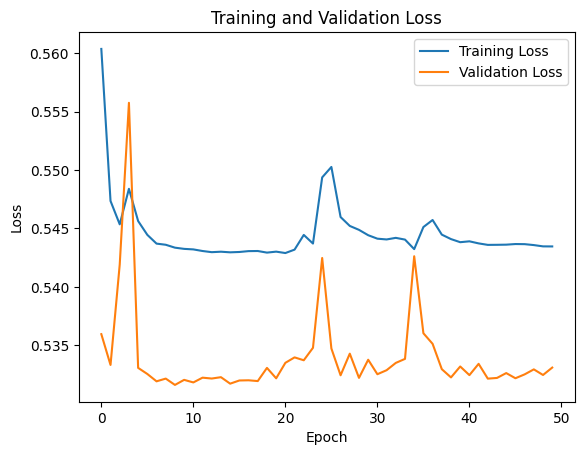

In [63]:

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [65]:

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Display the predictions
print("Predictions:")
print(y_pred)

# You might want to compare these predictions to the actual values (y_test)
# For example, you could print them together:
print("\nActual vs Predicted:")
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
comparison_df


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predictions:
[[0.9310072 ]
 [0.8038979 ]
 [0.60651106]
 [0.7207439 ]
 [0.83124536]
 [0.87633103]
 [0.5016888 ]
 [0.6563758 ]
 [0.8199875 ]
 [0.8102678 ]
 [0.70588803]
 [0.73201245]
 [0.69653875]
 [0.9574012 ]
 [0.82957834]
 [0.52222633]
 [0.86738867]
 [0.614217  ]
 [0.55292004]
 [0.61019814]
 [0.6830139 ]
 [0.49321064]
 [0.73176557]
 [0.8050776 ]
 [0.8013238 ]
 [0.61476356]
 [0.9584559 ]
 [0.86384326]
 [0.6466733 ]
 [0.7578074 ]
 [0.5279011 ]
 [0.71689147]
 [0.55374926]
 [0.8660752 ]
 [0.6652974 ]
 [0.74615365]
 [0.59548616]
 [0.97168595]
 [0.66444457]
 [0.694086  ]
 [0.97520447]
 [0.60434085]
 [0.6649027 ]
 [0.8675608 ]
 [0.9574903 ]
 [0.5701229 ]
 [0.96092355]
 [0.8467718 ]
 [0.8103093 ]
 [0.9425897 ]
 [0.89257497]
 [0.56823266]
 [0.73147625]
 [0.53737146]
 [0.9666886 ]
 [0.6090031 ]
 [0.9678654 ]
 [0.74188435]
 [0.6688668 ]
 [0.567247  ]
 [0.6214311 ]
 [0.68552184]
 [0.62927705]
 [0.5606721 ]
 [0.46399263]
 [0.6162634 ]
 [0.87426287]
 [0.9083581

,Actual,Predicted
361,0.93,0.931007
73,0.84,0.803898
374,0.39,0.606511
155,0.77,0.720744
104,0.74,0.831245
...,...,...
347,0.42,0.440370
86,0.72,0.689851
75,0.72,0.786043
438,0.67,0.710350


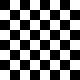

In [76]:
import numpy as np

a=np.zeros((20,20))

a[:10,10:20]=255

a[10:20,:10]=255

b=np.tile(a,(4,4))

from google.colab.patches import cv2_imshow

cv2_imshow(b)